In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso
from sklearn.model_selection import train_test_split

## lasso

### load data

In [33]:
base_path = os.path.dirname('__file__')
data_path = os.path.join(base_path, 'Hitters.csv')
data = pd.read_csv(data_path)._get_numeric_data()
data = data.dropna()
data_y = data['Salary']
cols = [ i for i in data.columns if i !='Salary']
data_x = data[cols]
print(data.head())
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y)



   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks  PutOuts  Assists  Errors  Salary  
1   414     375      632       43      10   475.0  
2   266     263      880       82      14   480.0  
3   838     354      200       11       3   500.0  
4    46      33      805       40       4    91.5  
5   336     194      282      421      25   750.0  


### Find final three predictors that remain in the model

In [34]:
flag = True
alpha = 0.001
print("The final three predictors that remain in the model are: ")
while flag:
    lasso = Lasso(alpha = alpha, max_iter= 10000, normalize = True).fit(data_x, data_y)
    coef = pd.Series(lasso.coef_, index = data_x.columns)
    if sum(coef != 0) == 3:
        alpha_3 = round(alpha, 3)
        flag == False
        alpha_predictor3 = alpha
        for c in data_x.columns:
            if coef[c] != 0:
                print(c)
        break
    else:
        if alpha < 1.0:
            alpha *= 10.0
        else:
            alpha += 0.1
    
    

The final three predictors that remain in the model are: 
Hits
CRuns
CRBI


### lasso model score & bias

In [35]:
alphas = [0.0, 0.001, 0.01, 0.1, 1.0, 10.0, 20.0, 30.0, 40.0, 50.0, 100.0]
print("The influence of adding bias on lasso: ")
for alpha in alphas:
    lasso = Lasso(alpha = alpha, max_iter= 10000, normalize = True).fit(x_train, y_train)
    score = lasso.score(x_test, y_test)
    print('Alpha: ', alpha, " Score: ", score)

The influence of adding bias on lasso: 
Alpha:  0.0  Score:  0.2012328495253396
Alpha:  0.001  Score:  0.20381797361091325
Alpha:  0.01  Score:  0.22646879728168667
Alpha:  0.1  Score:  0.3151832728472359
Alpha:  1.0  Score:  0.3837826646699724
Alpha:  10.0  Score:  0.1549893984883357
Alpha:  20.0  Score:  -0.0195843902271291
Alpha:  30.0  Score:  -0.022505630489749743
Alpha:  40.0  Score:  -0.022505630489749743
Alpha:  50.0  Score:  -0.022505630489749743
Alpha:  100.0  Score:  -0.022505630489749743


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8954935.084983455, tolerance: 4070.735815596435
  positive)


### draw coefficients' trtrajectories

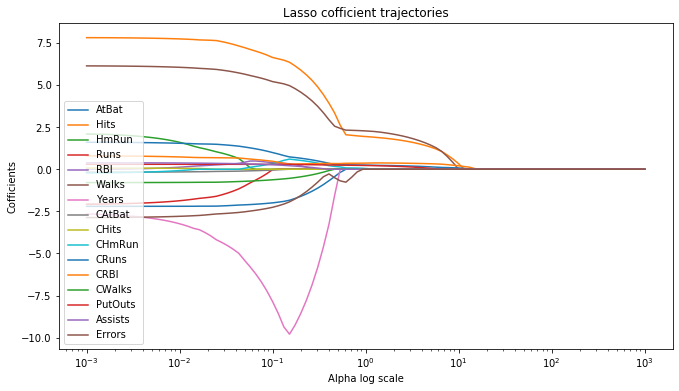

In [36]:
alphas = 10**np.linspace(-3,3,100)
lasso_coefficients = []
for alpha in alphas:
    lasso = Lasso(alpha = alpha, max_iter= 10000, normalize= True).fit(data_x, data_y)
    coef = pd.Series(lasso.coef_, index = data_x.columns)
    lasso_coefficients.append(lasso.coef_)
plt.figure(figsize = (11, 6))
plt.xscale( 'log')
plt.xlabel( 'Alpha log scale')
plt.ylabel( 'Cofficients')
plt.title('Lasso cofficient trajectories')

plt.plot(alphas, lasso_coefficients)
plt.legend(data_x.columns)
plt.show()

### find the optimal penalty value

In [37]:

model_lasso = LassoCV(cv = 10,alphas = None, max_iter = 10000, normalize = True).fit(data_x, data_y)
print('Optimal penalty: ', model_lasso.alpha_)
coef = pd.Series(model_lasso.coef_, index = data_x.columns)
print("Lasso picked " + str(sum(coef != 0)) + " predictors")


Optimal penalty:  0.0635481759985745
Lasso picked 14 predictors


### minimize the loss function after only remain 3 predictors 

In [38]:
alphas = np.linspace(alpha_3, 1000, 1000)
model_lasso = LassoCV(cv = 10,alphas = alphas, max_iter = 10000, normalize = True).fit(data_x, data_y)
print('Optimal penalty: ', model_lasso.alpha_)
coef = pd.Series(model_lasso.coef_, index = data_x.columns)
print("Lasso picked " + str(sum(coef != 0)) + " predictors")

Optimal penalty:  10.0
Lasso picked 3 predictors


## ridge

 ### Ridge model score & bias

In [39]:
alphas = [0.0, 0.001, 0.01, 0.1, 1.0, 10.0, 20.0, 30.0, 40.0, 50.0, 100.0]
print("The influence of adding bias on ridge: ")
for alpha in alphas:
    ridge = Ridge(alpha = alpha, max_iter= 10000, normalize = True).fit(x_train, y_train)
    score = ridge.score(x_test, y_test)
    print('Alpha: ', alpha, " Score: ", score)

The influence of adding bias on ridge: 
Alpha:  0.0  Score:  0.20123284952219134
Alpha:  0.001  Score:  0.29563681456675606
Alpha:  0.01  Score:  0.39211258086238726
Alpha:  0.1  Score:  0.4070240237728219
Alpha:  1.0  Score:  0.3727435197819964
Alpha:  10.0  Score:  0.22778471617012475
Alpha:  20.0  Score:  0.15136454701183633
Alpha:  30.0  Score:  0.11010890876021096
Alpha:  40.0  Score:  0.08454880485120908
Alpha:  50.0  Score:  0.0672086274869006
Alpha:  100.0  Score:  0.027001638454517307


### draw coefficients' trajectories

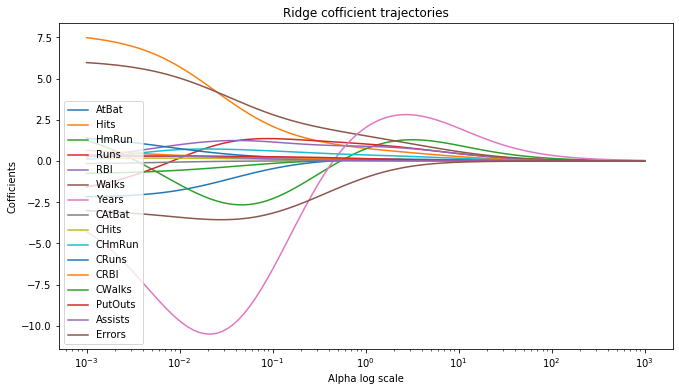

In [40]:
alphas = 10**np.linspace(-3,3,100)
ridge_coefficients = []
for alpha in alphas:
    ridge = Ridge(alpha = alpha, max_iter= 10000, normalize= True).fit(data_x, data_y)
    coef = pd.Series(ridge.coef_, index = data_x.columns)
    ridge_coefficients.append(ridge.coef_)
plt.figure(figsize = (11, 6))
plt.xscale( 'log')
plt.xlabel( 'Alpha log scale')
plt.ylabel( 'Cofficients')
plt.title('Ridge cofficient trajectories')

plt.plot(alphas, ridge_coefficients)
plt.legend(data_x.columns)
plt.show()

### ridge optimal ridge penalty

In [41]:
ridge_cv = RidgeCV(alphas = alphas, normalize = True).fit(data_x, data_y)
print('Optima penalty value: ', ridge_cv.alpha_)

Optima penalty value:  0.010722672220103232


## Short answer

### Explain in your own words the bias-variance tradeoff

#### Bias is like a presumption that a model makes on data. Variance is that, with different training dataset, the model's target function changes. Increasing bias error will decrease variance error. The increasing variance will decrease the bias error. Because bias error shows the difference between the predicted data and the true data. With lower bias error, the distance between predict data and true data in the training set become closer. This may cause overfitting problem, Overfitting reflects high variance error.

### What role does regularization play in this tradeoff

#### regularization add a small amount of bias to model which makes a big reduce of variance error

### Make reference to your findings in number (1) to describe models of high/low bias and variance

#### According to the results of lasso's and ridge's scores. We can find that, when alpha = 0, the score is lower than the score with alpha = 0.001. Through adding a little bias error, the model performance is increased, which hints the variance error decreased. The errors of a model are bias error, variance error, and Irreducible Error.  As the bias error increasing, the score of model first increased then decreased. At the beginning of alpha increasing, with increasing a small amount of bias error, the variance error drops a lot. So, the score is increasing. But as alpha keeps increasing, the dropping of variance error is less than increasing of bias error, the score starts decreasing.